In [1]:
from PIL import Image
import torchvision
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from datasets import load_dataset
from IPython.display import display
from trainer import trainer
import torchvision.models as models



In [2]:
import torch

if torch.backends.mps.is_available():
    device = torch.device("mps")
    print("Using MPS!")
else:
    device = torch.device("cpu")
    print("Using CPU.")

Using MPS!


In [3]:
# def get_pics(base, out_path):
#     if base.name.lower().endswith((".jpg", ".jpeg", ".png")):
#         image = Image.open(base).convert("RGB")
#         image = image.resize((142, 183), resample=Image.LANCZOS)
#         if "val" in base.name:
#             image.save(f"{out_path}/val/{base.name}")
#         else:
#             image.save(f"{out_path}/train/{base.name}")
#     elif base.is_dir():
#         for file in base.iterdir():
#             get_pics(file, out_path)

In [4]:
# from pathlib import Path

# get_pics(Path("imagenette2-320"), "content_images")

Shape: torch.Size([3, 183, 142])


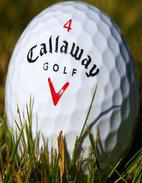

In [5]:
content_image = Image.open("../../content_images/train/n03445777_70.JPEG").convert("RGB")
transform = transforms.ToTensor()
tensor = transform(content_image)

print("Shape:", tensor.shape)  # (C, H, W)
display(content_image)

In [6]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

def get_transform(image: Image):
    width, height = image.size
    width = (int)(width / 4) * 4
    height = (int)(height / 4) * 4
    style_transform = transforms.Compose([
    transforms.Resize(size=(height,width)),
        transforms.ToTensor(),                    # Convert to tensor
        transforms.Normalize([0.5]*3, [0.5]*3)     # Normalize to [-1, 1]
    ])
    return style_transform
    

Shape: torch.Size([3, 180, 140])
Shape: tensor([[[ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
         [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
         [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
         ...,
         [ 0.8196, -0.5137,  0.2706,  ...,  0.9686,  1.0000,  1.0000],
         [ 0.7961, -0.5294,  0.1216,  ...,  0.9608,  1.0000,  0.9922],
         [ 0.8980,  0.0039,  0.2863,  ...,  0.9686,  1.0000,  1.0000]],

        [[ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
         [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
         [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
         ...,
         [ 0.8196, -0.5137,  0.2706,  ...,  0.9686,  1.0000,  1.0000],
         [ 0.7961, -0.5294,  0.1216,  ...,  0.9608,  1.0000,  0.9922],
         [ 0.8980,  0.0039,  0.2863,  ...,  0.9686,  1.0000,  1.0000]],

        [[ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
     

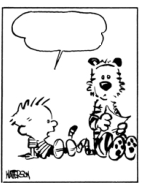

In [7]:
style_image = Image.open("../../OCR_PARSED_PANELS/panel_99.png").convert("RGB")
transformation = get_transform(style_image)
tensor = transformation(style_image)

print("Shape:", tensor.shape)  # (C, H, W)
print("Shape:", tensor)  # (C, H, W)
display(style_image)


In [14]:
# Dataset root folder
dataset_path = "../../content_images"

# Load dataset using ImageFolder
dataset = datasets.ImageFolder(root=dataset_path, transform=transformation)

# Create DataLoader
dataloader = DataLoader(dataset, batch_size=16, shuffle=True, num_workers=4)

In [9]:
# Load pretrained VGG16 features (no classifier)
# vgg16 = models.vgg16(pretrained=True).features.eval()

# # Save model weights
# torch.save(vgg16.state_dict(), "vgg16_features.pth")

In [10]:
from trainer import trainer
tensor = transformation(style_image)
tr = trainer(tensor, 5, dataloader, device, 1e-4, 1e5)
tr.train()

/opt/anaconda3/lib/python3.12/site-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([1, 64, 64])) that is different to the input size (torch.Size([16, 64, 64])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/opt/anaconda3/lib/python3.12/site-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([1, 128, 128])) that is different to the input size (torch.Size([16, 128, 128])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/opt/anaconda3/lib/python3.12/site-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([1, 256, 256])) that is different to the input size (torch.Size([16, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please en

Epoch [1], Batch [1], Content: 7.7993, Style: 36.2651, Total: 44.0644
Epoch [1], Batch [11], Content: 7.5431, Style: 17.7425, Total: 25.2856
Epoch [1], Batch [21], Content: 8.1156, Style: 16.7714, Total: 24.8870
Epoch [1], Batch [31], Content: 8.4560, Style: 14.8872, Total: 23.3432
Epoch [1], Batch [41], Content: 8.1460, Style: 13.4388, Total: 21.5849
Epoch [2], Batch [1], Content: 8.2741, Style: 11.6363, Total: 19.9104
Epoch [2], Batch [11], Content: 8.2011, Style: 9.8219, Total: 18.0230
Epoch [2], Batch [21], Content: 8.8194, Style: 8.2931, Total: 17.1125
Epoch [2], Batch [31], Content: 8.4476, Style: 7.5748, Total: 16.0225
Epoch [2], Batch [41], Content: 10.2570, Style: 6.8330, Total: 17.0900
Epoch [3], Batch [1], Content: 9.8192, Style: 6.5125, Total: 16.3317
Epoch [3], Batch [11], Content: 9.1813, Style: 5.6876, Total: 14.8689
Epoch [3], Batch [21], Content: 9.7162, Style: 5.2503, Total: 14.9664
Epoch [3], Batch [31], Content: 8.5498, Style: 4.8544, Total: 13.4041
Epoch [3], Batch

In [11]:
content_image = Image.open("../ContentImages/ILSVRC2012_test_00000016.JPEG").convert("RGB")
content_tensor = transform(content_image).unsqueeze(0).to(device)  # shape: (1, 3, H, W
print(content_tensor.shape)
with torch.no_grad():
    output = tr.model.net.forward(content_tensor)  # output shape: (1, 3, H, W)

torch.Size([1, 3, 375, 500])


In [12]:
import torchvision.transforms.functional as TF

# Unnormalize: [-1, 1] → [0, 1]
output = (output.clamp(-1, 1) + 1) / 2



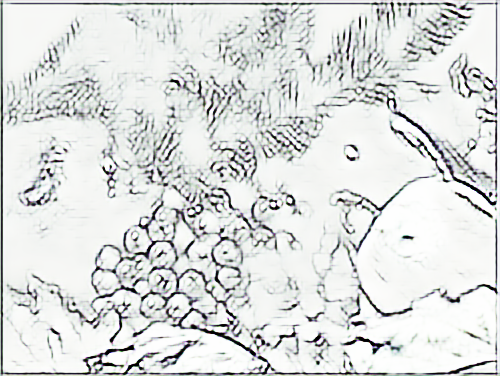

In [13]:
# Convert to PIL and save
stylized_image = TF.to_pil_image(output.squeeze(0).cpu())
display(stylized_image)